<center><h1>Project 2</h1></center>
<center><h1>Regression Task</h1></center>

## Tuberculosis Burden by Country(WHO)
The World Health Organization estimates the prevalence and mortality of Tuberculosis by country.

### Data Set Information:
This dataset includes WHO-generated estimates of TB prevalance and mortality and case detection rate for all forms from over *** countries.

#### Attribute Information:
The dataset consists of 47 Columns and 5120 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors and Social factors.

<h3>Columns</h3>

1. Country: Country
2. ISO 2-character country/territory code:
3. ISO 3-character country/territory code:
4. ISO numeric country/territory code:
5. Region:
6. Year:
7. Estimated total population number:
8. Estimated prevalence of TB (all forms) per 100 000 population:
9. Estimated prevalence of TB (all forms) per 100 000 population, low bound:
10. Estimated prevalence of TB (all forms) per 100 000 population, high bound:
11. Estimated prevalence of TB (all forms):
12. Estimated prevalence of TB (all forms), low bound:
13. Estimated prevalence of TB (all forms), high bound:
14. Method to derive prevalence estimates:
15. Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population:
16. Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound:
17. Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound:
18. Estimated number of deaths from TB (all forms, excluding HIV):
19. Estimated number of deaths from TB (all forms, excluding HIV), low bound:
20. Estimated number of deaths from TB (all forms, excluding HIV), high bound:
21. Estimated mortality of TB cases who are HIV-positive, per 100 000 population:
22. Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound:
23. Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound:
24. Estimated number of deaths from TB in people who are HIV-positive:
25. Estimated number of deaths from TB in people who are HIV-positive, low bound:
26. Estimated number of deaths from TB in people who are HIV-positive, high bound:
27. Method to derive mortality estimates:
28. Estimated incidence (all forms) per 100 000 population:
29. Estimated incidence (all forms) per 100 000 population, low bound:
30. Estimated incidence (all forms) per 100 000 population, high bound:
31. Estimated number of incident cases (all forms):
32. Estimated number of incident cases (all forms), low bound:
33. Estimated number of incident cases (all forms), high bound:
34. Method to derive incidence estimates:
35. Estimated HIV in incident TB (percent):
36. Estimated HIV in incident TB (percent), low bound:
37. Estimated HIV in incident TB (percent), high bound:
38. Estimated incidence of TB cases who are HIV-positive per 100 000 population:
39. Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound:
40. Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound:
41. Estimated incidence of TB cases who are HIV-positive:
42. Estimated incidence of TB cases who are HIV-positive, low bound:
43. Estimated incidence of TB cases who are HIV-positive, high bound:
44. Method to derive TBHIV estimates:
45. Case detection rate (all forms), percent:
46. Case detection rate (all forms), percent, low bound:
47. Case detection rate (all forms), percent, high bound:

### Source of the Dataset
https://public.tableau.com/s/sites/default/files/media/TB_Burden_Country.csv



<h2>Pre-Process Data</h2>
<center><h2> Import Libraries and Setups </h2></center></p>

In [1]:
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from collections import defaultdict
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')


<center><h2>Reading the dataset </h2></center></p>

In [2]:
data=pd.read_excel('TB_Burden_Country.xlsx')

<center><h2> Dropping the Irrelevant Columns </h2></center></p>

In [3]:
data=data.drop(columns=['ISO 2-character country/territory code','ISO 3-character country/territory code','Year', 'Method to derive TBHIV estimates' ])

<center><h2> Imputing the missing value</h2></center></p>

In [4]:
data['Method to derive incidence estimates']=data['Method to derive incidence estimates'].fillna('Not applicable')

<center><h2>  Imputing to fill the values using mean</h2></center></p>

In [5]:
from collections import defaultdict
averages=defaultdict(int)
for i in data.columns:

  count=0
  avg=0
  if data[i].dtype=='float64':
      avg = data[i].fillna(0).sum()/len(data[i])
      data[i] = data[i].fillna(avg)

<center><h2> Exploratory Data Analysis </h2></center></p>

In [6]:
high_TB = data.groupby('Country or territory name').mean().nlargest(5,'Estimated incidence of TB cases who are HIV-positive').reset_index()
high_TB

,Country or territory name,ISO numeric country/territory code,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound","Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",...,"Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,South Africa,710.0,4.562754e+07,612.416667,338.166667,966.541667,2.862500e+05,1.585417e+05,4.500000e+05,50.000000,...,47.620833,336.383333,309.037500,368.883333,164800.000000,151054.166667,180816.666667,67.916667,61.750000,74.416667
1,India,356.0,1.065147e+09,386.541667,323.375000,456.916667,4.020833e+06,3.337500e+06,4.791667e+06,34.583333,...,4.775417,8.445000,7.303333,9.583750,95666.666667,81679.166667,106845.833333,56.416667,53.541667,59.458333
2,Nigeria,566.0,1.301310e+08,330.500000,253.666667,417.166667,4.304167e+05,3.300000e+05,5.429167e+05,98.875000,...,28.954167,61.958333,43.170833,85.625000,86041.666667,59741.666667,118875.000000,10.129167,7.733333,14.408333
3,Zimbabwe,716.0,1.234234e+07,407.541667,223.333333,646.375000,5.066667e+04,2.783333e+04,8.016667e+04,33.416667,...,86.833333,469.416667,415.666667,530.791667,58833.333333,52250.000000,66416.666667,49.583333,44.333333,55.833333
4,Uganda,800.0,2.630387e+07,357.833333,186.916667,583.708333,8.670833e+04,4.587500e+04,1.404167e+05,43.208333,...,75.125000,242.583333,192.583333,303.416667,57375.000000,46208.333333,70916.666667,39.625000,34.737500,45.958333


<center><h2> Visualizing the Data for displaying top 5 countries with maximum TB cases  </h2></center></p>

In [7]:
high_TB.rename(columns = {'Country or territory name':'Country'}, inplace = True)

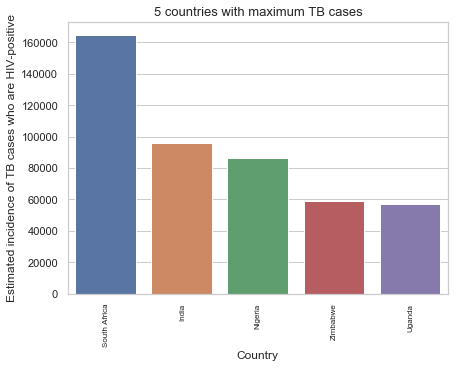

In [8]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid', palette='deep')

plt.subplot(1,2,1)
plot1 = sns.barplot(data = high_TB, x = high_TB.Country, y = high_TB['Estimated incidence of TB cases who are HIV-positive'])
plot1.set_title("5 countries with maximum TB cases", fontsize = 13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 90, ha = "center", fontsize = 8)
plt.show()

<center><h2> Dropping the Country from Dataset </h2></center></p>

In [9]:
data=data.drop(columns=['Country or territory name'])

<center><h2> Using Label Encoder for Object </h2></center></p>

In [10]:
for i in data.columns:
    if data[i].dtype=='object':
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

<center><h2> Plotting the heatmap for Correlationn </h2></center></p>

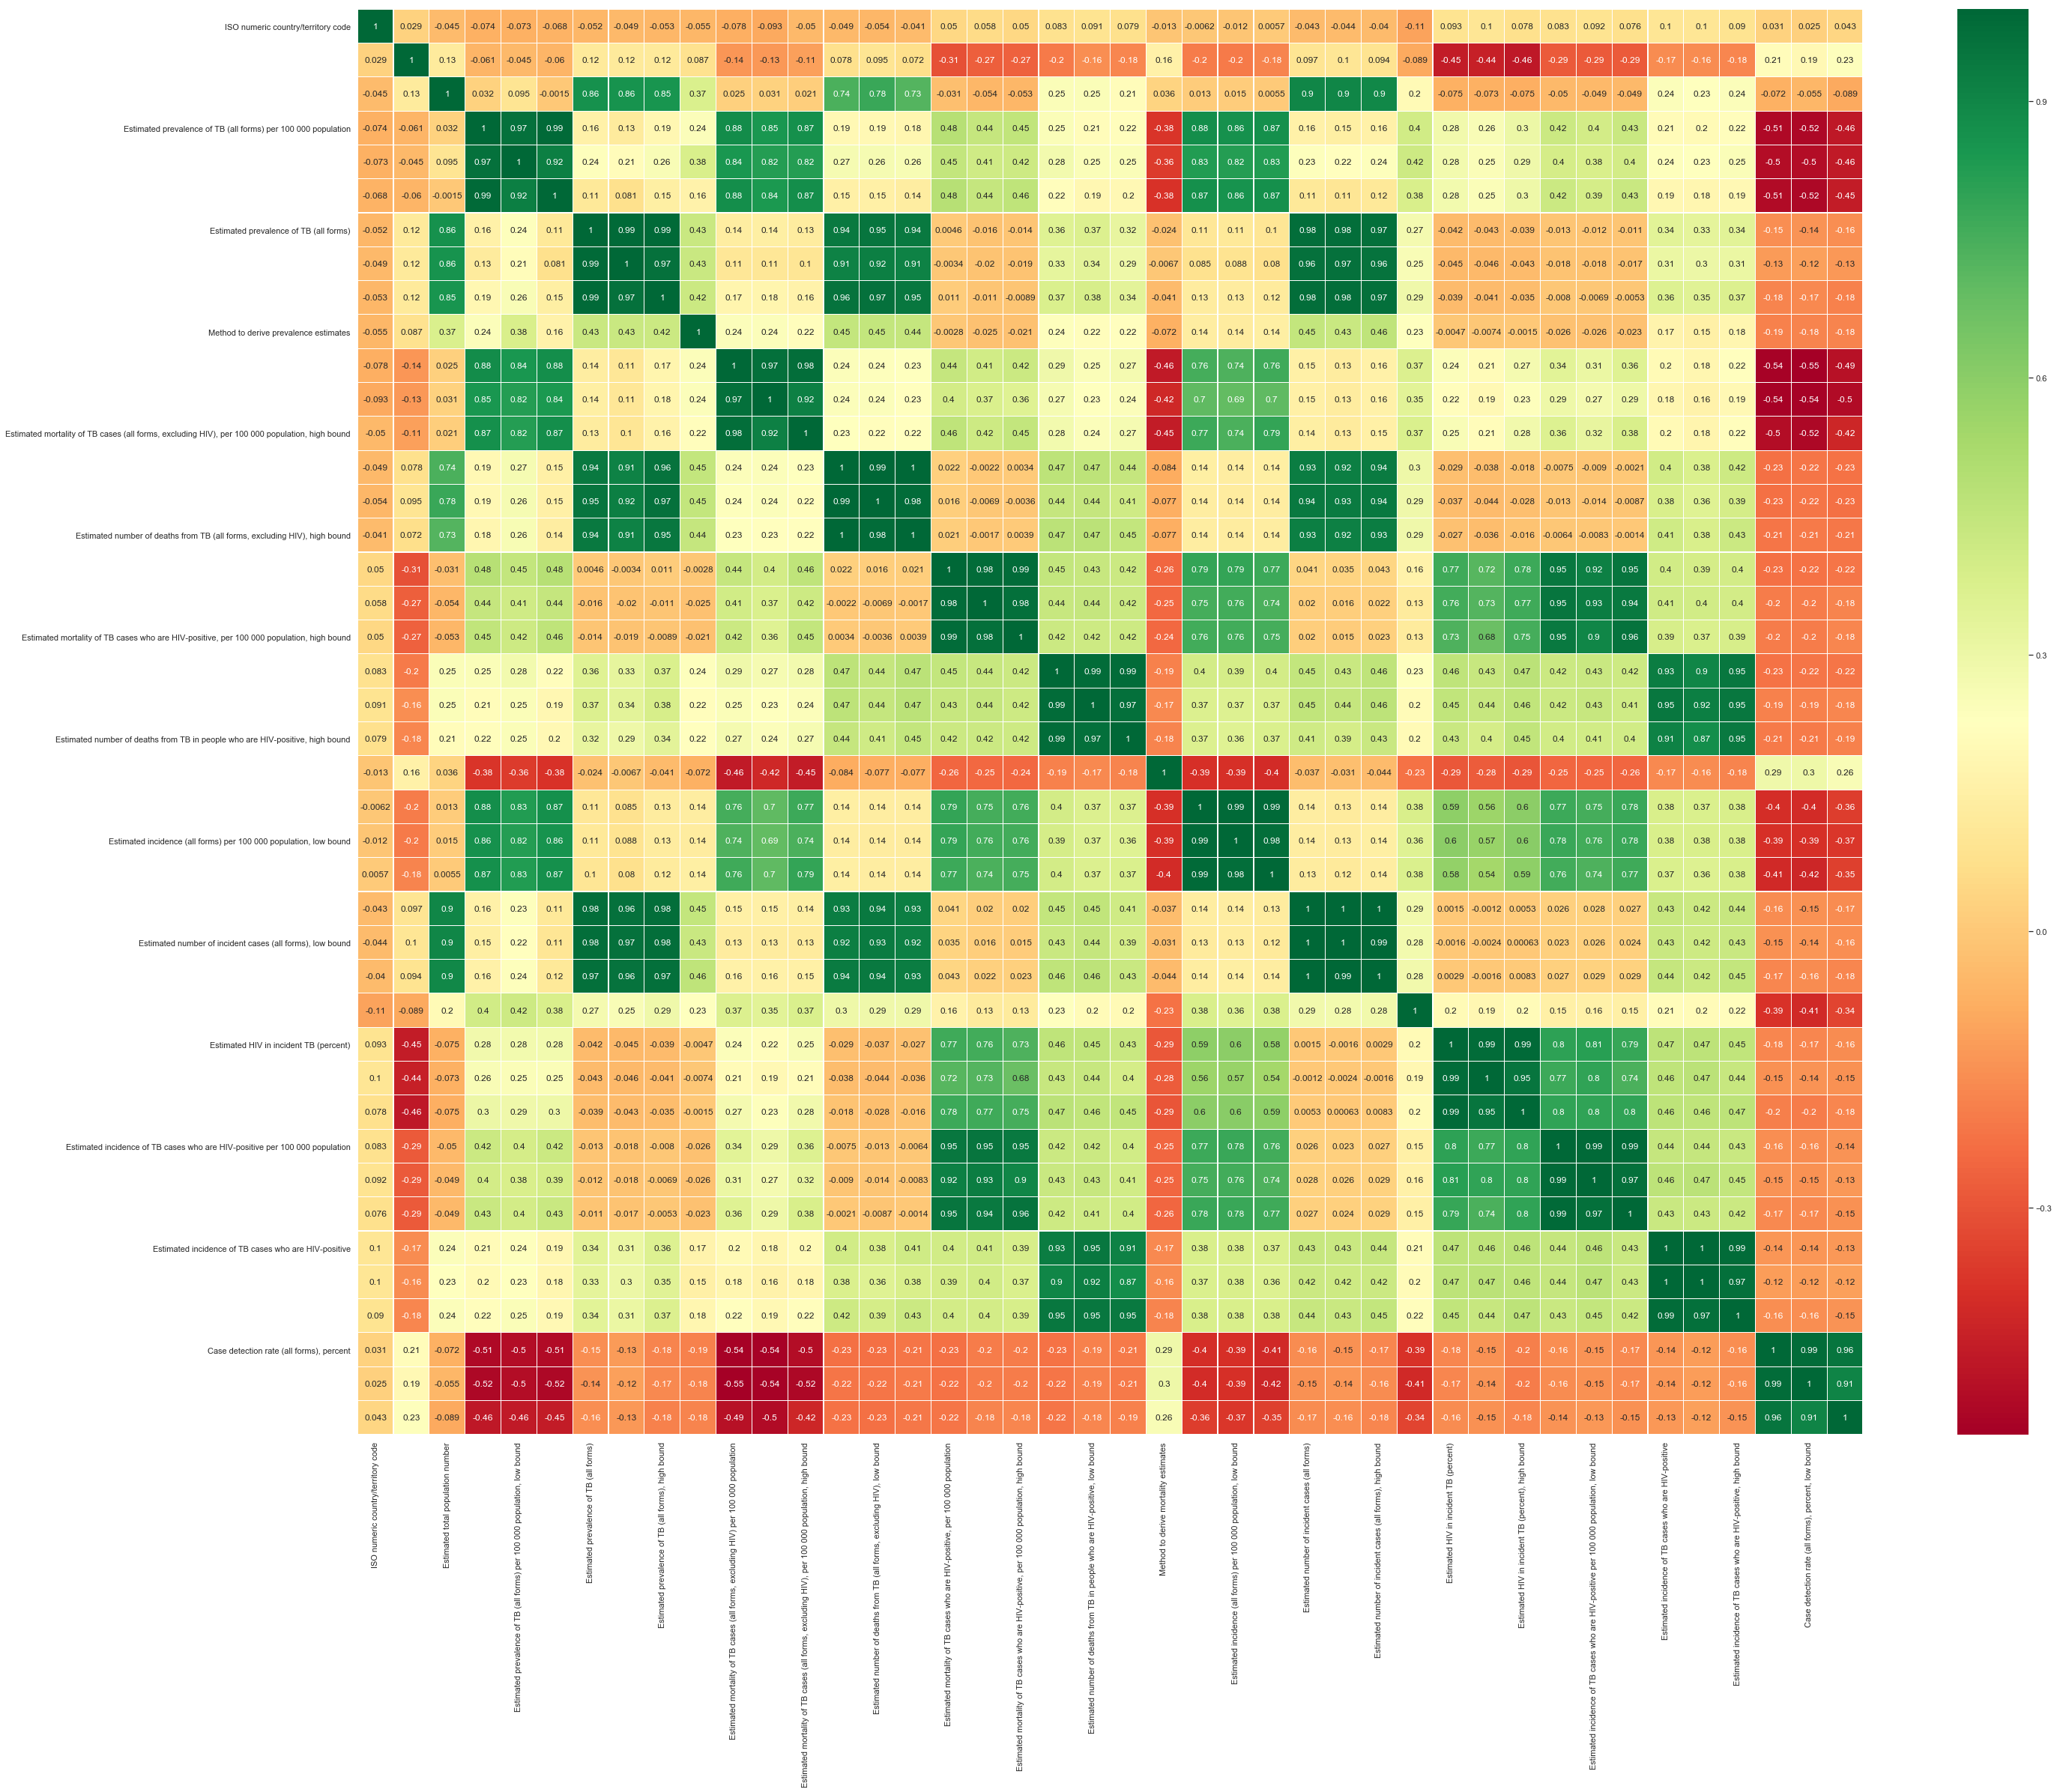

In [12]:
#Heat map for correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(45,35)
plt.show()

<center><h2> Defining target variable </h2></center></p>

In [13]:
y=data["Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound"].values
X=data.drop(columns="Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound").values

In [14]:
data.head()

,ISO numeric country/territory code,Region,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound",Method to derive prevalence estimates,...,"Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,4,2,11731193,306.0,156.0,506.0,36000.0,18000.0,59000.0,2,...,0.08,0.11,0.08,0.14,12.0,9.4,16.0,20.000000,15.000000,24.000000
1,4,2,12612043,343.0,178.0,562.0,43000.0,22000.0,71000.0,2,...,0.09,0.13,0.11,0.16,17.0,14.0,20.0,96.000000,80.000000,110.000000
2,4,2,13811876,371.0,189.0,614.0,51000.0,26000.0,85000.0,2,...,0.10,0.16,0.14,0.18,22.0,19.0,24.0,62.235465,56.525859,69.202408
3,4,2,15175325,392.0,194.0,657.0,59000.0,30000.0,100000.0,2,...,0.11,0.19,0.17,0.21,28.0,25.0,31.0,62.235465,56.525859,69.202408
4,4,2,16485018,410.0,198.0,697.0,68000.0,33000.0,110000.0,2,...,0.13,0.21,0.18,0.24,35.0,30.0,39.0,62.235465,56.525859,69.202408


<center><h2> Splitting the dataset </h2></center></p>

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<center><h2> Feature Selection</h2></center></p>

<center><h3> We have used StandardScaler which scale them such that the distribution is now centered around 0 with a standard deviation of 1</h3></center></p>

In [16]:
sc=StandardScaler()

In [17]:
# scaler=sc.fit(xTrain)
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Model Development

In [18]:
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

# BAGGING WITH SVR BOOTSTRAP

In [19]:
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
scores=['precision','recall']

print("# Tuning hyper-parameters")
print()
model_base=BaggingRegressor(base_estimator=SVR(kernel='poly',degree=2,C=1))
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'n_estimators': 84}

Grid scores found on development set:

0.636 (+/-0.095) for {'n_estimators': 50}
0.635 (+/-0.089) for {'n_estimators': 62}
0.636 (+/-0.091) for {'n_estimators': 73}
0.637 (+/-0.093) for {'n_estimators': 84}

train score is: 0.6737168043471873
r square score is: 0.6952849046116266



# SVR PASTING

In [20]:
scores=['precision','recall']
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
print("# Tuning hyper-parameters")
print()
model_base=BaggingRegressor(base_estimator=SVR(kernel='rbf',degree=3,C=1),bootstrap=False)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'n_estimators': 73}

Grid scores found on development set:

0.680 (+/-0.092) for {'n_estimators': 50}
0.680 (+/-0.092) for {'n_estimators': 62}
0.680 (+/-0.092) for {'n_estimators': 73}
0.680 (+/-0.092) for {'n_estimators': 84}

train score is: 0.7002330142317829
r square score is: 0.6492597954615191



# ADABOOST REGRESSOR WITH SVR

In [21]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=AdaBoostRegressor(base_estimator= SVR(kernel='rbf',degree=3,C=1),learning_rate=0.5,random_state=0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'n_estimators': 50}

Grid scores found on development set:

0.894 (+/-0.031) for {'n_estimators': 50}
0.894 (+/-0.031) for {'n_estimators': 62}
0.894 (+/-0.031) for {'n_estimators': 73}
0.894 (+/-0.031) for {'n_estimators': 84}

train score is: 0.9357915246581707
r square score is: 0.9244414511434882



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# BAGGING WITH KNN BOOTSTRAP

In [ ]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=BaggingRegressor(base_estimator= KNeighborsRegressor(n_neighbors=2))
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for KNN:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

#  KNN PASTING

In [ ]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=BaggingRegressor(base_estimator= KNeighborsRegressor(n_neighbors=2),bootstrap=False)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for KNN:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# ADABOOST WITH  KNN

In [24]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=AdaBoostRegressor(base_estimator= KNeighborsRegressor(n_neighbors=2),learning_rate=0.5,random_state=0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for KNN:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for KNN: {'n_estimators': 73}

Grid scores found on development set:

0.983 (+/-0.007) for {'n_estimators': 50}
0.983 (+/-0.007) for {'n_estimators': 62}
0.983 (+/-0.007) for {'n_estimators': 73}
0.983 (+/-0.007) for {'n_estimators': 84}

train score is: 0.9998423339852244
r square score is: 0.9830973771195108



# BAGGING WITH DECISION TREE BOOTSTRAP

In [25]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth=16),bootstrap=True)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Decision Tree: {'n_estimators': 50}

Grid scores found on development set:

0.990 (+/-0.008) for {'n_estimators': 50}
0.989 (+/-0.009) for {'n_estimators': 62}
0.989 (+/-0.008) for {'n_estimators': 73}
0.989 (+/-0.008) for {'n_estimators': 84}

train score is: 0.9985062830806412
r square score is: 0.9926343985522403



#  DECISION TREE PASTING

In [26]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
model_base=BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth=16),bootstrap=False)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Decision Tree: {'n_estimators': 50}

Grid scores found on development set:

0.983 (+/-0.012) for {'n_estimators': 50}
0.982 (+/-0.012) for {'n_estimators': 62}
0.983 (+/-0.012) for {'n_estimators': 73}
0.982 (+/-0.012) for {'n_estimators': 84}

train score is: 0.9999830997699372
r square score is: 0.9898505013453528



# ADABOOST WITH DECISION TREE

In [27]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=16),learning_rate=0.5,random_state=0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Decision Tree: {'n_estimators': 73}

Grid scores found on development set:

0.989 (+/-0.008) for {'n_estimators': 50}
0.990 (+/-0.009) for {'n_estimators': 62}
0.990 (+/-0.009) for {'n_estimators': 73}
0.990 (+/-0.010) for {'n_estimators': 84}

train score is: 0.999999399370856
r square score is: 0.9929132269830386



# GRADIENT BOOSTING REGRESSOR

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
model_base=GradientBoostingRegressor(max_depth=3,learning_rate=1.0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters: {'n_estimators': 62}

Grid scores found on development set:

0.976 (+/-0.014) for {'n_estimators': 50}
0.978 (+/-0.011) for {'n_estimators': 62}
0.976 (+/-0.013) for {'n_estimators': 73}
0.976 (+/-0.011) for {'n_estimators': 84}

train score is: 0.9984683177613273
r square score is: 0.980307351155991



## Neural Network

In [22]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import SGD
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (3840, 41)
Test matrix shape (1280, 41)


In [23]:
# step 1: make the model - no hidden layer
model = Sequential()
#input layer: input)_dim: number of columns in X_train 
model.add(Dense(14, input_dim = X_train.shape[1] , activation = 'relu'))
#hidden layers
#output
model.add(Dense(10, activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
model.add(Dropout(rate=0.3))
#model.add(Dense(100, activation = 'relu'))

model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))
# step 2: compile the model -> create the computational graph
model.compile(loss='mse' , optimizer='adam' )

# step 3: train the model: fit epochs and batch_size
model.fit(X_train, y_train, epochs = 100 , batch_size =20,validation_data=(X_test,y_test))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3840 samples, validate on 1280 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3840/3840 [==============================] - 1s 289us/sample - loss: 2561.0006 - val_loss: 1625.4296
Epoch 2/100
3840/3840 [==============================] - 0s 95us/sample - loss: 822.3792 - val_loss: 335.4088
Epoch 3/100
3840/3840 [==============================] - 0s 100us/sample - loss: 424.2337 - val_loss: 251.5546
Epoch 4/100
3840/3840 [==============================] - 0s 96us/sample - loss: 409.4402 - val_loss: 208.5953
Epoch 5/100
3840/3840 [==============================] - 0s 94us/sample - loss: 350.9647 - val_loss: 175.6475
Epoch 6/100
3840/3840 [==============================] - 0s 93us/sample - loss: 310.1755 - val_loss: 196.6956
Epoch

In [24]:
# model.evaluate(X_train, y_train)
pred=model.predict(X_test)
print(r2_score(y_test,pred))

0.9008758762600271


In regression, we have taken 2 hidden layers, 1 input and output layers respectively. The input layer has 14 nodes and a ReLu activation. The 2 hidden layers have 10 nodes and ReLu activation. And, as with regression the output layer consists of 1 node. We have also used the Dropout function with a rate =0.3 to avoid overfitting the model. The predicted score of the model is 0.8619.

# PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components = 12)
pca.fit(X_train)
xTrain=pca.transform(X_train)
xTest = pca.transform(X_test)

In [27]:
pca.explained_variance_ratio_.sum()

0.9735047399080541

#97.45% variance will be explained with 12 features

## Models

###  KNN Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
tuned_parameters = [{'n_neighbors':[1,2,3,4,5]}]


print("# Tuning hyper-parameters #")
print()

model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for knn regressor:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))


# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))


# scores = cross_val_score(model, X_test, y_test, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation test score: {:.2f}".format(scores.mean()))

# Tuning hyper-parameters #

Best parameters set found on development set:

Best parameters for knn regressor: {'n_neighbors': 2}

Grid scores found on development set:

0.977 (+/-0.005) for {'n_neighbors': 1}
0.980 (+/-0.007) for {'n_neighbors': 2}
0.973 (+/-0.005) for {'n_neighbors': 3}
0.967 (+/-0.008) for {'n_neighbors': 4}
0.961 (+/-0.009) for {'n_neighbors': 5}

train score is: 0.9953881555963218
r square score is: 0.9780570170449613


The accuracy score for the model: 0.98

The accuracy score with Bagging: 0.989

The accuracy score with Pasting: 0.987

The accuracy score with AdaBoost: 0.986

## Linear SVR

In [30]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import LinearSVR
tuned_parameters = [{'C': [0.1, 1, 5, 10, 100]}]

print("# Tuning hyper-parameters")
print()

    
model = GridSearchCV(LinearSVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Linear SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))
# print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Linear SVM: {'C': 1}

Grid scores found on development set:

0.890 (+/-0.029) for {'C': 0.1}
0.892 (+/-0.036) for {'C': 1}
0.891 (+/-0.038) for {'C': 5}
0.891 (+/-0.037) for {'C': 10}
0.891 (+/-0.023) for {'C': 100}

train score is: 0.8942309766288732
r square score is: 0.8879475774688637



### SVR

In [31]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 5, 10]},
                    {'kernel': ['poly'], 'gamma': [1e-3, 1e-4], 'degree': [2,3],'C': [1, 5, 10]},
                    {'kernel': ['linear'], 'C': [1, 5, 10]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))
# print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'C': 1, 'kernel': 'linear'}

Grid scores found on development set:

0.548 (+/-0.041) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.009 (+/-0.035) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.838 (+/-0.013) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.381 (+/-0.047) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.870 (+/-0.013) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.575 (+/-0.041) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.141 (+/-0.030) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
-0.192 (+/-0.021) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
-0.171 (+/-0.023) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
-0.193 (+/-0.020) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
-0.045 (+/-0.055) for {'C': 5, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
-0.190 (+/-0.021) for {'C': 5, 'degree': 2, 'gamma': 0.0

The accuracy score for the model: 0.9992

The accuracy score with Bagging: 0.6386

The accuracy score with Pasting: 0.6733

The accuracy score with AdaBoost: 0.9565


### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
tuned_parameters = [{'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(LinearRegression(), tuned_parameters, cv=5, return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Linear Regression:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))
# print()


# scores = cross_val_score(model, X_test, y_test, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation test score: {:.2f}".format(scores.mean()))
# print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'normalize': True}

Grid scores found on development set:

0.899 (+/-0.027) for {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.899 (+/-0.027) for {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.504 (+/-0.098) for {'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.504 (+/-0.098) for {'copy_X': True, 'fit_intercept': False, 'normalize': False}
0.899 (+/-0.027) for {'copy_X': False, 'fit_intercept': True, 'normalize': True}
0.899 (+/-0.027) for {'copy_X': False, 'fit_intercept': True, 'normalize': False}
0.504 (+/-0.098) for {'copy_X': False, 'fit_intercept': False, 'normalize': True}
0.504 (+/-0.098) for {'copy_X': False, 'fit_intercept': False, 'normalize': False}

train score is: 0.904664630495022
r square score is: 0.8947384996288733



## Ridge Regression

In [33]:
from  sklearn.linear_model import Ridge
tuned_parameters = [{'alpha': [0.01, 0.1, 1, 10, 100]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(Ridge(), tuned_parameters, cv=5, return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Ridge Regression:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))
# print()


# scores = cross_val_score(model, X_test, y_test, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation test score: {:.2f}".format(scores.mean()))
# print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Ridge Regression: {'alpha': 100}

Grid scores found on development set:

0.899 (+/-0.027) for {'alpha': 0.01}
0.899 (+/-0.027) for {'alpha': 0.1}
0.899 (+/-0.027) for {'alpha': 1}
0.899 (+/-0.027) for {'alpha': 10}
0.900 (+/-0.025) for {'alpha': 100}

train score is: 0.9045322688520918
r square score is: 0.8946057261150852



## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
tuned_parameters = [{'alpha': [0.01, 0.1, 1, 10, 100]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(Lasso(), tuned_parameters, cv=5, return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Lasso Regression:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# training
# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))
# print()

# #testing
# scores = cross_val_score(model, X_test, y_test, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation testing score: {:.2f}".format(scores.mean()))
# print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Lasso Regression: {'alpha': 0.1}

Grid scores found on development set:

0.899 (+/-0.027) for {'alpha': 0.01}
0.899 (+/-0.026) for {'alpha': 0.1}
0.894 (+/-0.020) for {'alpha': 1}
0.787 (+/-0.019) for {'alpha': 10}
0.092 (+/-0.050) for {'alpha': 100}

train score is: 0.90460608482586
r square score is: 0.8944976537688696



## Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

tuned_parameters = [{'max_depth':[10,11,12,13,14]}] 


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(DecisionTreeRegressor(criterion='mse'), tuned_parameters, cv=5,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree Regressor:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# scores = cross_val_score(model, X_train, y_train, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation test score: {:.2f}".format(scores.mean()))
# print()

# scores = cross_val_score(model, X_test, y_test, cv = 5)
# print("Cross-validation scores: {}".format(pd.DataFrame(scores)))
# print("Average cross-validation training score: {:.2f}".format(scores.mean()))
# print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Decision Tree Regressor: {'max_depth': 12}

Grid scores found on development set:

0.907 (+/-0.051) for {'max_depth': 10}
0.911 (+/-0.058) for {'max_depth': 11}
0.915 (+/-0.049) for {'max_depth': 12}
0.909 (+/-0.042) for {'max_depth': 13}
0.912 (+/-0.052) for {'max_depth': 14}

train score is: 0.9966009440920024
r square score is: 0.948415583244857



The accuracy score for the model: 0.9965

The accuracy score with Bagging: 0.9894

The accuracy score with Pasting: 0.9875

The accuracy score with AdaBoost: 0.9891

The gradient boosting accuracy score: 0.9827

## Comparison and Conclusion

After running PCA for the regression models, we conclude that the performance doesn't get better.